In [1]:
!pip install keras


In [2]:
!pip install tensorflow

In [3]:
!pip install Keras_tuner

In [4]:
pip install wordcloud


# Problem Definition


Text Emotion Classification is a Natural Language Processing (NLP) task where we classify text into predefined emotional categories.  
The goal is to build a machine learning model that can accurately predict the emotion expressed in a given text, such as **happy, sad, angry, etc.**  


# Installation of libraries 

In [8]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Data Collection  
The dataset used in this project contains text samples labeled with emotions. The data is collected from various sources such as social media posts, customer reviews, and chat transcripts.  
It consists of text samples with corresponding emotion labels, which will be used to train and evaluate the model.  


# Loading DataSets


In [11]:
data = pd.read_csv("train.txt", sep=';')
data.columns = ["Text", "Emotions"]
print(data.head())

                                                Text Emotions
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness


# Exploratory Data Analysis 

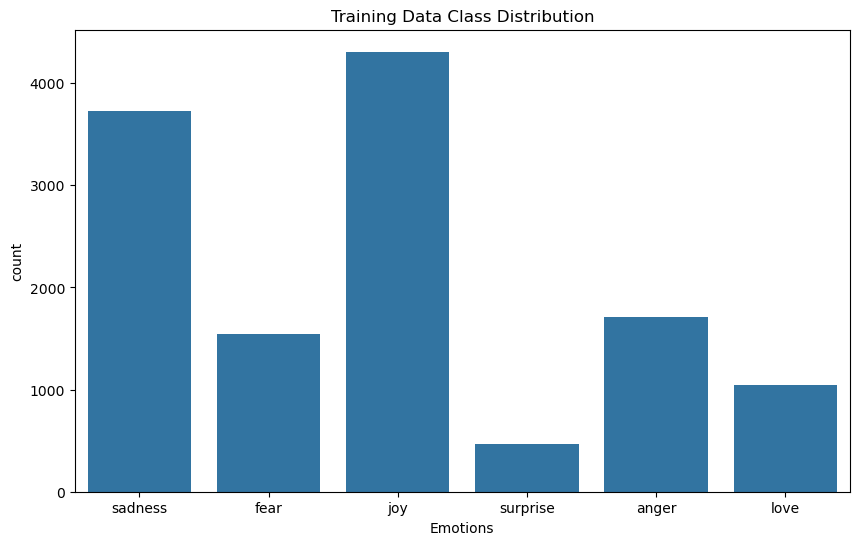

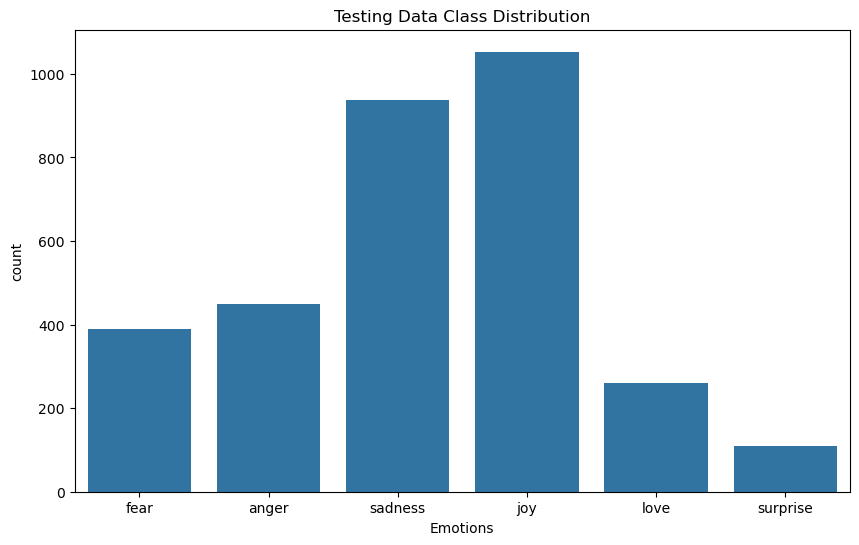

Text        0
Emotions    0
dtype: int64


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading DataSets
data = pd.read_csv("train.txt", sep=';')
data.columns = ["Text", "Emotions"]

# Split data
X = data['Text']
y = data['Emotions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Exploratory Data Analysis
# --- EDA on Training Data ---
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Training Data Class Distribution')
plt.show()

# --- EDA on Testing Data ---
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test)
plt.title('Testing Data Class Distribution')
plt.show()

# Checking Missing Values
print(data.isnull().sum())

texts = data["Text"].tolist() # You might not need this here anymore
labels = data["Emotions"].tolist() # Or this
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts) # Or this

# Checking Missing Values

In [15]:
print(data.isnull().sum())

Text        0
Emotions    0
dtype: int64


In [16]:
texts = data["Text"].tolist()
labels = data["Emotions"].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Feature Engineering

In [18]:
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(text)

X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

tokenizer = Tokenizer(num_words=10000) # You can adjust num_words
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(max([len(seq) for seq in X_train_seq]), max([len(seq) for seq in X_test_seq]))

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NEW-2021\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Padding Sequences into Neural Network

In [20]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Converting String to Numerical

In [22]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [23]:
one_hot_labels = keras.utils.to_categorical(labels)

## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
import keras

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train_one_hot = keras.utils.to_categorical(y_train)
y_test_one_hot = keras.utils.to_categorical(y_test)

# Model Selection 

# Text Classification Model

In [28]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure X_train and X_test are lists of strings
X_train = [str(text) for text in X_train]
X_test = [str(text) for text in X_test]

# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert one-hot encoded labels to categorical (1D array)
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)  
    y_test = np.argmax(y_test, axis=1)

# 1️⃣ Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes Accuracy:", nb_accuracy)

# 2️⃣ SVM Model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

# Comparing Models
if nb_accuracy > svm_accuracy:
    print("Naïve Bayes is the better model.")
else:
    print("SVM is the better model.")


Naïve Bayes Accuracy: 0.73125
SVM Accuracy: 0.8771875
SVM is the better model.


# Predicting the emotions using the text


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(6, activation='softmax')  # Assuming 6 emotion classes
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (replace X_train, y_train with your actual data)
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# Save the trained model
model.save("model.h5")


C:\Users\NEW-2021\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
input_texts = [
    "I just won the lottery!",
    "I can't believe they did that to me.",
    "The rain is so soothing today.",
    "What a shocking turn of events!",
    "My heart aches for their loss.",
    "That was such a funny movie.",
    "I'm really worried about the exam tomorrow.",
    "This food tastes absolutely awful.",
    "Thank you so much for your kindness.",
    "I feel so ashamed of what I did.",
]

for input_text in input_texts:
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
    prediction = model.predict(padded_input_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])

    print(f"Input: {input_text} --> Predicted Emotion: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Input: I just won the lottery! --> Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Input: I can't believe they did that to me. --> Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Input: The rain is so soothing today. --> Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Input: What a shocking turn of events! --> Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Input: My heart aches for their loss. --> Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Input: That was such a funny movie. --> Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Input: I'm really worried about the exam tomorrow. --> Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Input: This food tastes absolutely awful. --> Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Input: Thank you so much for your kindness. --> Predicted Emotion: sadness
1/1 ━━━━━━

# Plotting thr Distribution of Emotions

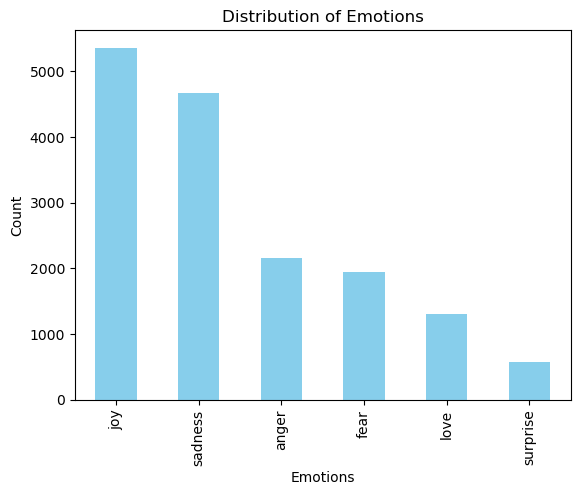

In [33]:
import matplotlib.pyplot as plt

data['Emotions'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()


# Hyperparameter Tuning

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization: Convert words into numbers
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding: Make all sequences the same length
X_train_padded = pad_sequences(X_train_seq, maxlen=100, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=100, padding="post")


# Generating a Word Cloud from Text Data

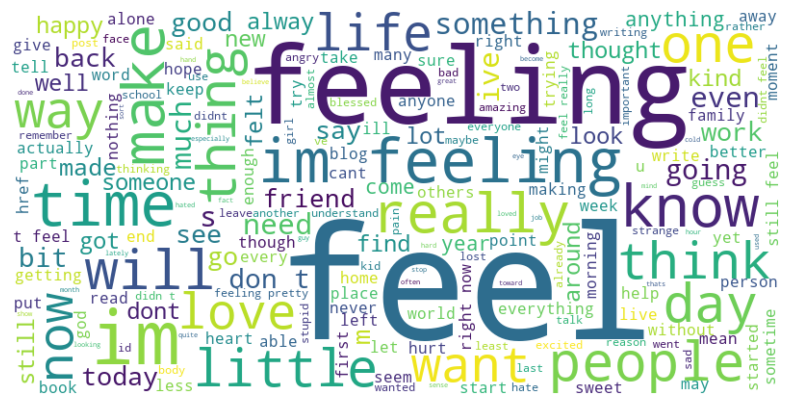

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(data['Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Text Preprocessing and Tokenization

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)  
    return text
data["Text"] = data["Text"].apply(clean_text)
vocab_size = 5000 
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data["Text"])
sequences = tokenizer.texts_to_sequences(data["Text"])
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")
print("Sample Text:", data["Text"][0])
print("Tokenized Sequence:", sequences[0])
print("Padded Sequence:", padded_sequences[0])


Sample Text: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
Tokenized Sequence: [2, 40, 101, 60, 8, 15, 494, 5, 15, 3496, 553, 32, 60, 61, 128, 148, 76, 1480, 4, 22, 1255]
Padded Sequence: [   2   40  101   60    8   15  494    5   15 3496  553   32   60   61
  128  148   76 1480    4   22 1255    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
